###### SMM635 tutorial #1

## libraries

In [37]:
import os
import pandas as pd
import statsmodels.api as sm 
import matplotlib.pyplot as plt
from matplotlib import rc

## Time Series Decomposition

In [19]:
# Import data

In [20]:
wd = os.getcwd()

In [21]:
wd

'C:\\Users\\35196\\Documents\\GitHub\\data-viz-smm635'

In [22]:
in_file = os.path.join(wd, 'data','airlinePassengers','airline_passengers.csv') 
df = pd.read_csv(in_file)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [23]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [24]:
df.loc[:,'Month'] = pd.to_datetime(df['Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [25]:
df.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [26]:
df.set_index('Month', inplace= True)

In [27]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [28]:
# Decompose the time series with sm 

In [29]:
decomposition = sm.tsa.seasonal_decompose(df['Passengers'])

In [36]:
decomposition.trend 

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

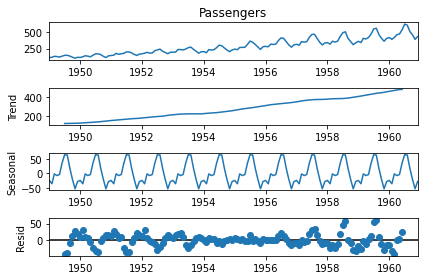

In [34]:
fig = decomposition.plot()

# Tufte line chart 

In [73]:
rc('font', **{'family': 'sans-serif', 'sans-serif':['Computer Modern Roman']})

rc('text', usetex=False)

## Load Data

In [53]:
in_file = os.path.join (wd, 'data','movieIndustry', 'lead_actor_race.csv')

years, n, perc =[], [], []

with open (in_file, 'r') as pipe:
    for line in pipe.readlines() [1:]:
        # print(line)
        parsed = line.split(',')
        years.append(int(parsed[0]))
        n.append(int(parsed[1]))
        perc.append(float(parsed[2]))
        


In [76]:
years

[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [77]:
n

[172, 172, 174, 163, 168, 173, 167, 139, 145]

In [78]:
perc

[10.5, 15.1, 16.7, 12.9, 13.6, 13.9, 19.8, 26.6, 27.6]

## Viz

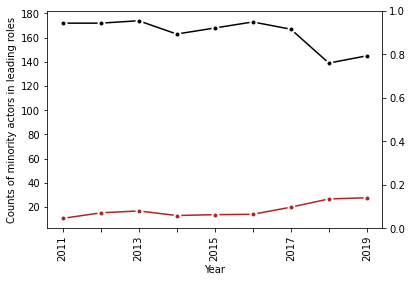

In [114]:
# figure
fig = plt.figure(figsize= (6,4))

# create plot
ax = fig.add_subplot(111)

# plot data 
ax.plot(years, n, color='k', marker='o', markerfacecolor='k', 
        markeredgecolor='white', markeredgewidth=2)

# aest
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# save plot
ax.set_xlabel('Year')
ax.set_ylabel('Counts of minority actors in leading roles')
ax.set_xticks(years)
labels = []
for i in years:
    if i % 2 != 0: 
        labels.append(str(i))
    else: 
        labels.append('')
ax.set_xticklabels(labels, rotation = 90)

# secondary ax
axs = ax.twinx()
ax.plot(years, perc, color='firebrick', marker='o', markerfacecolor='firebrick', markeredgecolor='white', markeredgewidth=2,markersize=6)

# aest
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


# show plot
plt.show()

# Lollipot chart 

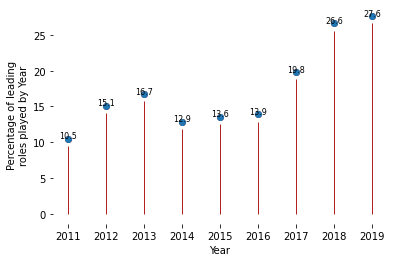

In [106]:
# figure
fig = plt.figure(figsize= (6,4))


# add plot
ax = fig.add_subplot(111)

#plot data

ax.scatter(years, perc, color='firebrick')
ymax =[i-1 for i in perc]
ax.vlines(x=years, ymin=0, ymax=ymax, color='firebrick', linewidth=1)

# text  boxes
for i in range(len(years)):
    x_pos = years [i]
    y_pos = perc [i] +1
    string = '% s' % perc[i]
    ax.text(x_pos, y_pos, string, horizontalalignment='center', 
            verticalalignment='top',fontsize=8)


# aes 
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# axes
ax.set_xlabel('Year')
ax.set_ylabel('Percentage of leading\nroles played by Year')

#plot data 
ax.scatter(years, perc)